In [7]:
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline


O_data = np.load('O_data.npy')
print(O_data.itemsize, O_data.ndim, O_data.dtype, O_data.shape,)
print(O_data)

8 1 float64 (10000,)
[42.22670059 60.50752623 57.62726847 ... 40.67781771 58.29258401
 36.67346682]


In [8]:
#1: print the mean/median/variance
print("mean of O data: ", np.mean(O_data, axis = 0), "\n")
print("median of O data: ", np.median(O_data, axis = 0), "\n")
print("variance of O data: ", np.var(O_data, axis = 0))


mean of O data:  50.3324924158986 

median of O data:  49.99696148252969 

variance of O data:  115.88565801835402


(10000,)

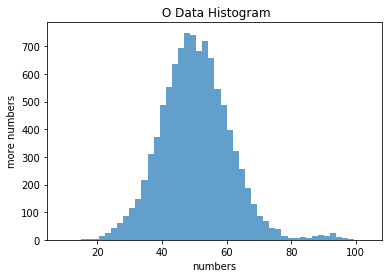

In [81]:
#2 plot a histogram for the observations
plt.hist(O_data, alpha = 0.7, bins = 50);

plt.title(' O Data Histogram')
plt.xlabel('numbers')
plt.ylabel('more numbers');
O_data.shape

In [82]:
#3 Yes some observations are spurious, and I can see outliers on both upper
#and lower ends of the observed range of values


In [110]:
#4 retrieve the limits for .998 confidence interval 



R = st.norm.interval(.998, loc=np.mean(O_data), scale=st.sem(O_data))
R

(49.999811652168596, 50.6651731796286)

In [111]:
#4 set Xmin/Xmax range of histogram values based on values retrieved from confidence int.

filt_Obs = np.histogram(O_data, range=R)

filt_Obs[0].shape




(10,)

mean of filtered  data:  28.5 

median of filtered data:  29.0 

variance of filtered data:  5.65


(array([30., 26., 30., 27., 32., 27., 30., 24., 28., 31.]),
 array([49.99981165, 50.0663478 , 50.13288396, 50.19942011, 50.26595626,
        50.33249242, 50.39902857, 50.46556472, 50.53210087, 50.59863703,
        50.66517318]),
 <a list of 10 Patch objects>)

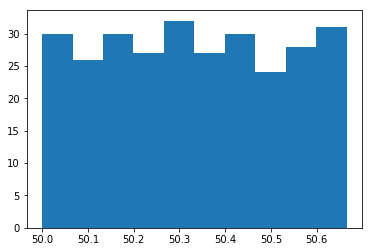

In [112]:
#5 determine mean median and variance of filtered observations and plot hist

print("mean of filtered  data: ", np.mean(filt_Obs[0], axis = 0), "\n")
print("median of filtered data: ", np.median(filt_Obs[0], axis = 0), "\n")
print("variance of filtered data: ", np.var(filt_Obs[0], axis = 0))

plt.hist(O_data, range=R)

In [ ]:
#6 Outliers are removed
#but I couldn't get it to look right. 
#The mean an median values don't line up.
#for some reason there are only 10 observaions left
#no matter what I choose as the confidence value, the graph is still
#the same. I can't figure it out 8(
#i don't know what I'm doing wrong



In [122]:
#7 repeat steps 4 5, 6 with CI .99
S = st.norm.interval(.99, loc=np.mean(O_data), scale=st.sem(O_data))
S
filt_Obs2 = np.histogram(O_data, range=R)

mean of filtered  data:  28.5 

median of filtered data:  29.0 

variance of filtered data:  5.65


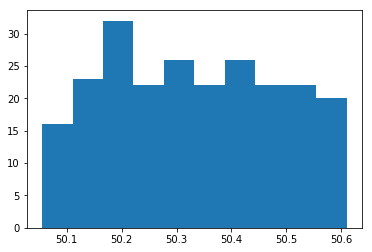

In [120]:

print("mean of filtered  data: ", np.mean(filt_Obs2[0], axis = 0), "\n")
print("median of filtered data: ", np.median(filt_Obs2[0], axis = 0), "\n")
print("variance of filtered data: ", np.var(filt_Obs2[0], axis = 0))

plt.hist(O_data, range=S);

In [ ]:
#7 I don't think this is doing what it's supposed to do.
#based on what I read on Con. Int. there should be an increase in agreement between the central tendencies
#and a decrease in variance sense we are cutting down the wide range of the data set into
#a more central representative block of its values. Beased on the results I got
#I'm not able to tell the sufficiency of .998 ci vs .99
#I tried to figure it out but it's just to hard to find adequeat directions on how to do it online in 
#python, the documentation really doesn't explain alot aboout it.

#If there's anyway you could show me how this was supposed to be done carrectly that'd
#be super cool thanks.